In [203]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from rename_cols import *
from get_data import *
import scipy.stats as stats
from sklearn.preprocessing import scale


In [204]:
# this came from Sids get_data
# read excel files as data-frames:

consumerDiscrete = pd.read_excel('../data/U of M Student Data - Consumer Discretionary .xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )
consumerStaples = pd.read_excel('../data/U of M Student Data - Consumer Staples.xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )
industrials = pd.read_excel('../data/U of M Student Data - Industrials.xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )

# remove string data columns
consumerDiscrete = consumerDiscrete.iloc[:, 5::]
consumerStaples  = consumerStaples.iloc[:, 5::]
industrials      = industrials.iloc[:, 5::]

# list of all the data sets:
dataSet = [consumerDiscrete, consumerStaples, industrials]

for i in range( len(dataSet) ):
    # calculate column means:
    colMean = stats.nanmean(dataSet[i], axis=0)

    # find indices where you need to replace:
    inds = np.where( np.isnan( dataSet[i] ) )

    # convert data-frame to numpy array:
    data = pd.DataFrame.as_matrix( dataSet[i] )

    # replace NA values with col means:
    data[inds] = np.take(colMean, inds[1])

    # clear variable value:
    dataSet[i] = None

    # replace variable with new value:
    dataSet[i] = scale(data)

In [205]:
rename_col_dict = {'Industry Classifications':'industry',
                            'Geographic Locations':'loc',
                            'Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)':'t_ev',
                            'Total Revenue [LTM] ($USDmm, Historical rate)':'t_rev',
                            'EBITDA [LTM] ($USDmm, Historical rate)':'ebitda',
                            'EBITDA Margin % [LTM]':'ebitda_margin',
                            'TEV/LTM Total Revenues [My Setting] [LTM as of 12/31/2016] (x)':'t_ev/ltm',
                            'TEV/LTM EBITDA [My Setting] [LTM as of 12/31/2016] (x)':'t_ev/ltm_ebitda',
                            'Est. Annual Revenue Growth - 1 Yr % - Capital IQ [Latest] (%)':'est_1yr_rev_gr',
                            'Est. Annual EBITDA Growth - 1 Yr % - Capital IQ [Latest] (%)':'est_1yr_ebitda_gr',
                            'Total Revenues, 1 Yr Growth % [LTM] (%)':'t_rev_1yr_growth',
                            'EBITDA, 1 Yr Growth % [LTM] (%)':'ebitda_1yr_gr',
                            'Total Revenues, 3 Yr CAGR % [LTM] (%)':'t_rev_3_yr_cagr',
                            'EBITDA, 3 Yr CAGR % [LTM] (%)':'ebitda_3yr_cagr',
                            'Total Revenues, 5 Yr CAGR % [LTM] (%)':'t_rev_5yr_cagr',
                            'EBITDA, 5 Yr CAGR % [LTM] (%)':'ebitda_5yr_cagr',
                            'Return on Assets % [LTM]':'return_on_assets',
                            'Return on Equity % [LTM]':'return_on_equity',
                            'Capex as % of Revenues [Latest Annual] (%)':'capex/rev',
                            'EBITDA / Interest Exp. [LTM]':'ebitda/interest_exp',
                            'Total Debt/Capital % [Latest Annual]':'t_debt/cap',
                            'Total Debt/Equity % [Latest Annual]':'t_debt/equity'}

cols = ['t_ev',
        't_rev',
        'ebitda',
        'ebitda_margin',
        't_ev/ltm',
        't_ev/ltm_ebitda',
        'est_1yr_rev_gr',
        'est_1yr_ebitda_gr',
        't_rev_1yr_growth',
        'ebitda_1yr_gr',
        't_rev_3_yr_cagr',
        'ebitda_3yr_cagr',
        't_rev_5yr_cagr',
        'ebitda_5yr_cagr',
        'return_on_assets',
        'return_on_equity',
        'capex/rev',
        'ebitda/interest_exp',
        't_debt/cap','t_debt/equity']

In [206]:
consumerDiscrete = pd.DataFrame(dataSet[0], columns = cols)
consumerStaples = pd.DataFrame(dataSet[1], columns = cols)
industrials = pd.DataFrame(dataSet[2], columns = cols)


# consumerDiscrete.rename(columns=rename_col_dict, inplace=True)
# consumerStaples.rename(columns=rename_col_dict, inplace=True)
# industrials.rename(columns=rename_col_dict, inplace=True)

Let's look at `industrials`. First, I will do a basic overview of the data.

In [207]:
print 'industrials dataframe shape: ', industrials.shape
print 'columns name: ', industrials.columns.tolist()
print
print industrials.head(3)

industrials dataframe shape:  (473, 20)
columns name:  ['t_ev', 't_rev', 'ebitda', 'ebitda_margin', 't_ev/ltm', 't_ev/ltm_ebitda', 'est_1yr_rev_gr', 'est_1yr_ebitda_gr', 't_rev_1yr_growth', 'ebitda_1yr_gr', 't_rev_3_yr_cagr', 'ebitda_3yr_cagr', 't_rev_5yr_cagr', 'ebitda_5yr_cagr', 'return_on_assets', 'return_on_equity', 'capex/rev', 'ebitda/interest_exp', 't_debt/cap', 't_debt/equity']

       t_ev     t_rev    ebitda  ebitda_margin  t_ev/ltm  t_ev/ltm_ebitda  \
0  4.535051  2.607147  5.202611       1.357549  1.633461        -0.020155   
1  0.041547 -0.111344 -0.035581       0.511802  0.988805         0.083611   
2 -0.213044 -0.332696 -0.307223       0.930029  1.981141         0.239261   

   est_1yr_rev_gr  est_1yr_ebitda_gr  t_rev_1yr_growth  ebitda_1yr_gr  \
0       -0.089515      -2.451016e-17         -0.203587      -0.124874   
1        0.248341       2.618968e-01         -0.077531       0.022595   
2        0.491134       2.977716e-01          0.151194      -0.002559   

   t_rev

In [208]:
# let's take a look at numerical data

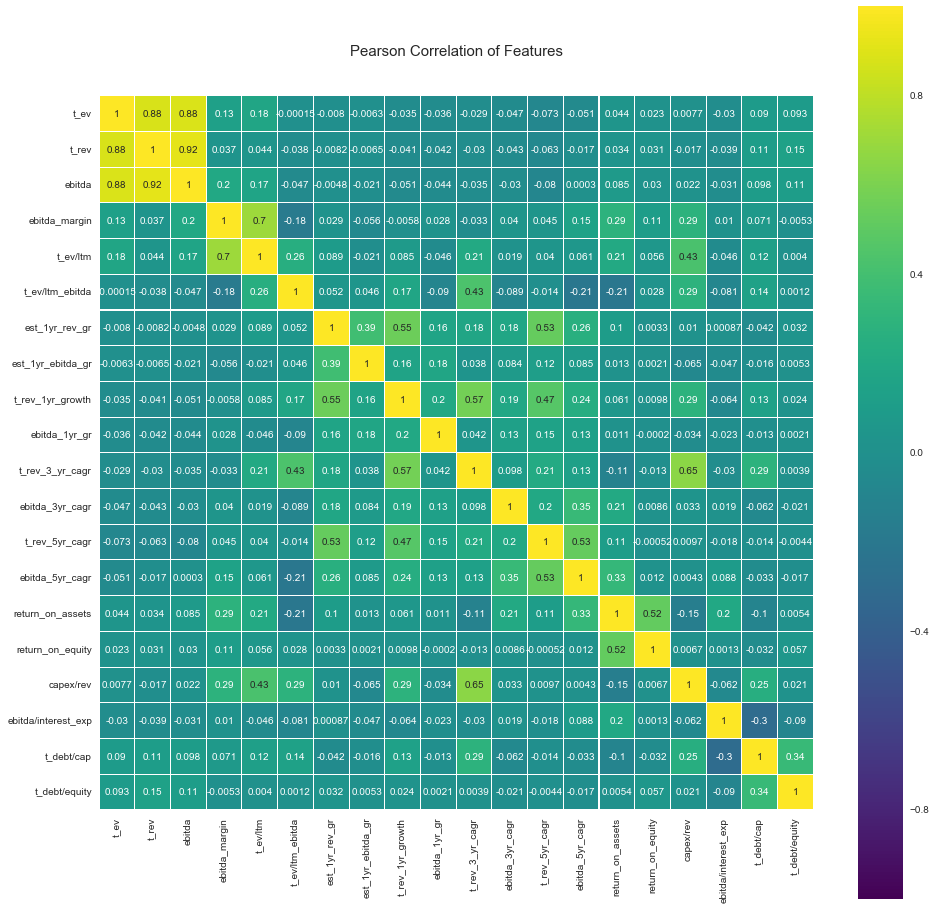

In [209]:
#num_industrials.corr(): Compute pairwise correlation of columns, excluding NA/null values
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(industrials.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Takeaway from this plot is that TEV is strongly correlated with total revenue [LTM] and EBITDA.

In [210]:
industrials.describe()

,t_ev,t_rev,ebitda,ebitda_margin,t_ev/ltm,t_ev/ltm_ebitda,est_1yr_rev_gr,est_1yr_ebitda_gr,t_rev_1yr_growth,ebitda_1yr_gr,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex/rev,ebitda/interest_exp,t_debt/cap,t_debt/equity
count,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02
mean,7.135471e-17,1.519808e-17,5.245980e-17,-8.426428e-17,-1.396581e-16,-4.271894e-17,-2.347195e-18,-2.335459e-17,-1.173597e-18,2.523234e-17,2.083135e-17,-3.843531e-17,-1.408317e-18,-6.572145e-17,7.956990e-17,6.733514e-18,2.746218e-17,-1.619564e-17,2.150030e-16,-2.564310e-17
std,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00
min,-2.830487e-01,-3.711011e-01,-3.680205e-01,-2.241988e+00,-1.168258e+00,-7.956951e-01,-3.542578e+00,-2.726749e+00,-1.309270e+00,-8.593892e-01,-7.173682e-01,-2.460202e+00,-1.685311e+00,-3.239001e+00,-1.080202e+01,-2.163837e+01,-3.720678e-01,-5.612553e-01,-1.520307e+00,-3.640547e-01
25%,-2.674335e-01,-3.397989e-01,-3.503679e-01,-6.796790e-01,-6.670202e-01,-3.089722e-01,-2.378887e-01,-2.284839e-01,-3.193094e-01,-2.352398e-01,-1.556626e-01,-3.930215e-01,-4.149753e-01,-4.241592e-01,-5.195834e-01,2.543617e-02,-2.889971e-01,-4.434771e-01,-5.711827e-01,-2.802540e-01
50%,-2.211711e-01,-2.558062e-01,-2.847525e-01,-1.759483e-01,-3.005078e-01,-1.642755e-01,0.000000e+00,-2.451016e-17,-1.493299e-01,-1.206289e-01,-7.626385e-02,-8.161025e-02,-8.926792e-02,2.974577e-16,-6.338657e-02,3.806511e-02,-2.080840e-01,-2.819325e-01,-7.009356e-16,-1.833638e-01
75%,-8.118287e-02,-8.999706e-02,-1.119823e-01,3.538053e-01,3.224185e-01,8.668787e-03,1.410747e-01,6.265380e-02,3.451997e-02,0.000000e+00,7.879360e-17,9.512819e-02,1.280567e-01,2.775280e-01,4.128190e-01,5.193831e-02,-4.326118e-02,1.685527e-16,3.429546e-01,0.000000e+00
max,1.711910e+01,1.186445e+01,1.041570e+01,5.781457e+00,6.348867e+00,1.217818e+01,1.041484e+01,1.191844e+01,9.422557e+00,1.273119e+01,2.076318e+01,7.553930e+00,1.059947e+01,9.465159e+00,4.384533e+00,1.159337e+00,1.401223e+01,6.414698e+00,6.824122e+00,1.241092e+01


It seems that there is an outlier in the data. Let's see which company it is. 

In [211]:
print 'columns name: ', industrials.columns.tolist()

columns name:  ['t_ev', 't_rev', 'ebitda', 'ebitda_margin', 't_ev/ltm', 't_ev/ltm_ebitda', 'est_1yr_rev_gr', 'est_1yr_ebitda_gr', 't_rev_1yr_growth', 'ebitda_1yr_gr', 't_rev_3_yr_cagr', 'ebitda_3yr_cagr', 't_rev_5yr_cagr', 'ebitda_5yr_cagr', 'return_on_assets', 'return_on_equity', 'capex/rev', 'ebitda/interest_exp', 't_debt/cap', 't_debt/equity']


In [212]:
outliers = []
for col in industrials.columns:
    print 'outlier for column ', col
    outliers.append(industrials.ix[industrials[col]==industrials[col].max()].index[0])
outliers = set(outliers)

outlier for column  t_ev
outlier for column  t_rev
outlier for column  ebitda
outlier for column  ebitda_margin
outlier for column  t_ev/ltm
outlier for column  t_ev/ltm_ebitda
outlier for column  est_1yr_rev_gr
outlier for column  est_1yr_ebitda_gr
outlier for column  t_rev_1yr_growth
outlier for column  ebitda_1yr_gr
outlier for column  t_rev_3_yr_cagr
outlier for column  ebitda_3yr_cagr
outlier for column  t_rev_5yr_cagr
outlier for column  ebitda_5yr_cagr
outlier for column  return_on_assets
outlier for column  return_on_equity
outlier for column  capex/rev
outlier for column  ebitda/interest_exp
outlier for column  t_debt/cap
outlier for column  t_debt/equity


In [213]:
# drop the outliers
industrials_drop = industrials.drop(outliers, axis=0)
print(industrials_drop.shape)
print(industrials.shape)

(459, 20)
(473, 20)


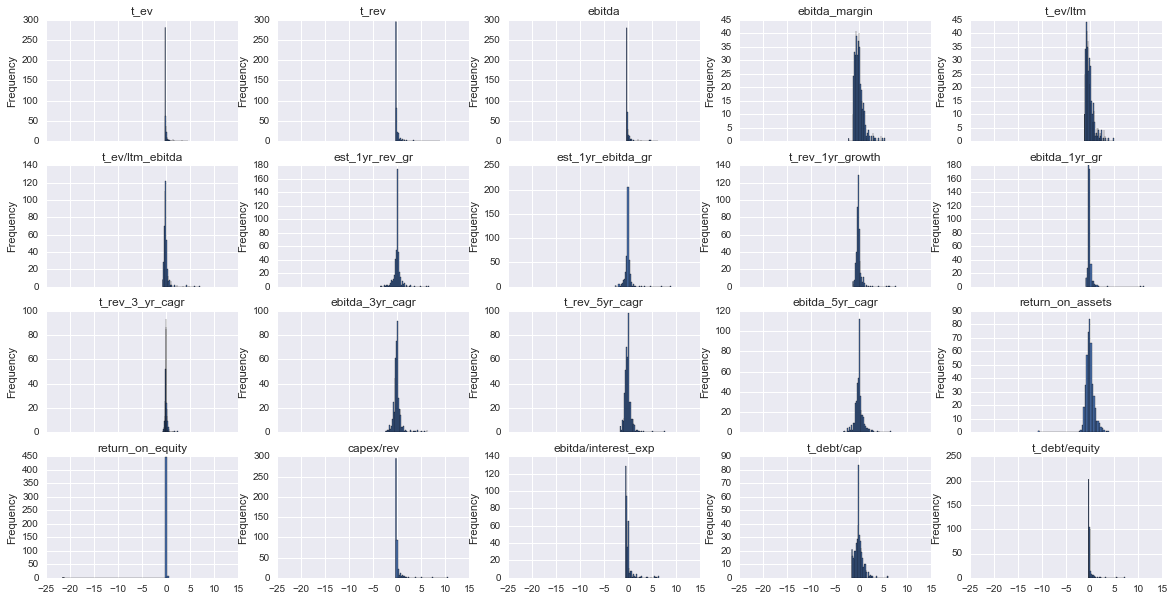

In [214]:
# feature distributions
fig, ax = plt.subplots(4,5, sharex=True, figsize=(20, 10))
a = ax.flatten()
for i, col in enumerate(industrials_drop.columns):
    industrials_drop[col].plot('hist', bins=50, ax=a[i])
    a[i].set_title(col)

Above distribution plots suggest us to fill the NA value in the original dataframe using median due the skewed distrituion.

In [215]:
# fill na value using median
industrials_drop = industrials_drop.fillna(industrials_drop.median())

In [216]:
industrials_drop.describe()

,t_ev,t_rev,ebitda,ebitda_margin,t_ev/ltm,t_ev/ltm_ebitda,est_1yr_rev_gr,est_1yr_ebitda_gr,t_rev_1yr_growth,ebitda_1yr_gr,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex/rev,ebitda/interest_exp,t_debt/cap,t_debt/equity
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,4.590000e+02,459.000000,459.000000,4.590000e+02,459.000000,459.000000,4.590000e+02,459.000000,459.000000,459.000000,4.590000e+02,4.590000e+02,459.000000
mean,-0.033196,-0.021720,-0.017636,-0.003846,-0.030087,-0.051957,-0.037740,-4.506763e-02,-0.046906,-0.030830,-5.489453e-02,-0.015931,-0.035142,-9.644487e-03,0.001412,-0.005598,-0.029568,-6.360659e-03,-3.537254e-02,-0.050451
std,0.624800,0.848508,0.890377,0.969668,0.936562,0.688478,0.848325,8.120001e-01,0.786011,0.814133,2.477333e-01,0.950593,0.764154,8.990264e-01,0.974146,1.013569,0.772436,9.655178e-01,9.004475e-01,0.622623
min,-0.283049,-0.371101,-0.368020,-2.241988,-1.168258,-0.795695,-3.542578,-2.726749e+00,-1.309270,-0.859389,-7.173682e-01,-2.460202,-1.685311,-3.239001e+00,-10.802021,-21.638374,-0.372068,-5.612553e-01,-1.520307e+00,-0.364055
25%,-0.267137,-0.339299,-0.348570,-0.672244,-0.665572,-0.311278,-0.250414,-2.403502e-01,-0.322165,-0.235240,-1.595069e-01,-0.395219,-0.407428,-4.196379e-01,-0.513581,0.025904,-0.288697,-4.392072e-01,-5.744710e-01,-0.280667
50%,-0.222286,-0.254777,-0.284752,-0.166654,-0.307751,-0.170040,0.000000,-2.451016e-17,-0.150690,-0.124009,-7.774241e-02,-0.088517,-0.092762,2.974577e-16,-0.053382,0.038181,-0.208683,-2.748160e-01,-7.009356e-16,-0.186256
75%,-0.084062,-0.090818,-0.113555,0.353805,0.278958,-0.005743,0.133046,5.561682e-02,0.029625,0.000000,7.879360e-17,0.101407,0.125960,2.803189e-01,0.387808,0.051794,-0.046857,1.685527e-16,3.215809e-01,0.000000
max,4.535051,8.983707,6.138497,5.437582,4.929175,6.926441,6.593087,8.965672e+00,7.668368,11.326461,2.359519e+00,6.260568,7.601646,6.612863e+00,3.924334,0.617416,10.488020,6.319811e+00,6.120434e+00,7.207355


In [217]:
print("Even after dropping all outliers the mean still exceeds 75% for t_ev and t_rev. May want to be stricter in defining what an outlier is?? Not really sure")

Even after dropping all outliers the mean still exceeds 75% for t_ev and t_rev. May want to be stricter in defining what an outlier is?? Not really sure


## Fit the data into linear model

We are going to divide data into three parts: training, validation, and testing. Maintain the splitting across different models.

### Splitting the data

Let's only set up index here instead of actual data, because later there might be preprocessing on the data

In [218]:
np.random.seed(12434)
permutation = np.random.permutation(num_industrials.shape[0])
train_index = permutation[:len(permutation)*4/5]
test_index = permutation[len(permutation)*4/5:]

In [227]:
train_data = industrials.ix[train_index, :]
print 'training data shape: ', train_data.shape
test_data = industrials.ix[test_index, :]
print 'testing data shape: ', test_data.shape

training data shape:  (378, 20)
testing data shape:  (95, 20)


In [228]:
train_x = train_data.iloc[:, 1:]
train_y = train_data.iloc[:, 0]
test_x = test_data.iloc[:, 1:]
test_y = test_data.iloc[:, 0]

In [238]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics


lr_model = LinearRegression()
lr_model.fit(np.array(train_x.iloc[:, 0:1]), train_y)
y_hat = lr_model.predict(np.array(train_x.iloc[:, 0:1]))
print metrics.mean_squared_error(y_hat, train_y)
rf_model = RandomForestRegressor()
scores = cross_val_score(rf_model, train_x, train_y, cv=5, scoring='neg_mean_squared_error')
print 'mean square error for cross validation: ', np.mean(scores), np.std(scores)

0.258854117118
mean square error for cross validation:  -0.720037011638 1.34191737172


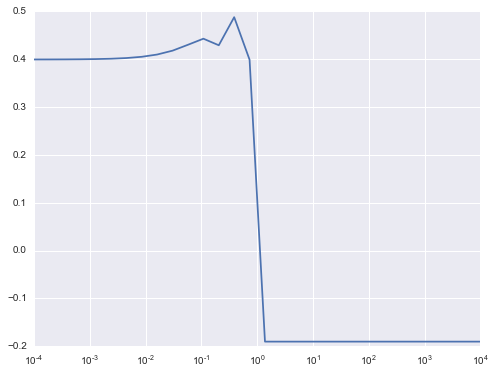

In [263]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, 4, 30)
scores = list()
scores_std = list()

n_folds = 5

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, np.array(train_x.iloc[:, 0:1]), train_y, cv=n_folds, n_jobs=-1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

In [282]:
lasso_model = Lasso()
lasso_model.fit(np.array(train_x.iloc[:, 0:1]), train_y)
y_hat = lasso_model.predict(np.array(train_x.iloc[:, 0:1]))
print metrics.mean_squared_error(y_hat, train_y)




lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(np.array(train_x.iloc[:, 0:1]), train_y)
y_hat = lasso_model.predict(np.array(train_x.iloc[:, 0:1]))
print metrics.mean_squared_error(y_hat, train_y)


1.14476311513
0.258942708018


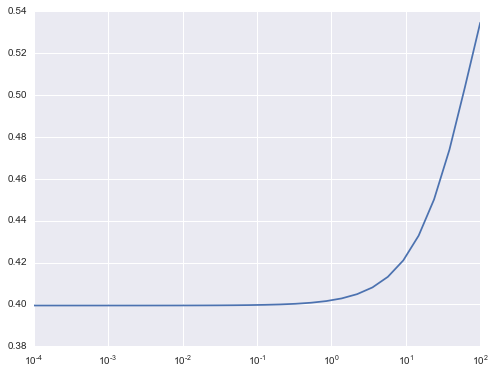

In [276]:
rid = Ridge(random_state=0)
alphas = np.logspace(-4, 2, 30)
scores = list()
scores_std = list()

n_folds = 5

for alpha in alphas:
    rid.alpha = alpha
    this_scores = cross_val_score(rid, np.array(train_x.iloc[:, 0:1]), train_y, cv=n_folds, n_jobs=-1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

In [280]:
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(np.array(train_x.iloc[:, 0:1]), train_y)
y_hat = ridge_model.predict(np.array(train_x.iloc[:, 0:1]))
print metrics.mean_squared_error(y_hat, train_y)

0.258854166217


In [30]:
train_x.iloc[:, 2]

43     15.80
176    25.90
1      19.70
268     7.97
232    11.80
201     9.35
133    17.70
186    10.10
461    28.30
269     6.70
66     25.00
120     3.03
270     6.64
238    23.60
257     4.25
118     4.73
21     30.90
249    10.90
472     5.18
178    11.30
172     9.46
279     8.88
79      2.69
161    19.90
374    25.20
240    11.90
188     5.58
384    24.70
295    14.90
454    18.60
       ...  
108    14.40
324    25.10
143     4.63
73     20.70
296    11.80
304    13.50
114    17.00
365    19.30
224    11.40
345    28.10
453    13.30
39      5.17
164     8.21
354    19.60
14      8.58
11     13.70
370    24.40
175    16.20
10     27.50
303     6.72
393    16.10
446    10.10
195    21.10
30     28.00
17      7.75
333    11.10
134    15.10
54      9.06
359    12.70
260    16.30
Name: ebitda_margin, dtype: float64

In [31]:
train_x

,t_rev,ebitda,ebitda_margin,t_ev/ltm,t_ev/ltm_ebitda,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_gr,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex/rev,ebitda/interest_exp,t_debt/cap,t_debt/equity
43,636.40,100.500,15.80,1.920,12.20,-7.850,-28.800,-9.220,-21.50,28.200,28.100,23.800,23.800,7.350,17.100,2.690,22.800,36.10,56.60
176,2450.60,633.500,25.90,1.220,5.02,6.740,-2.370,5.740,35.80,4.360,45.500,8.230,33.400,5.250,43.900,2.535,18.700,45.90,84.80
1,2627.20,517.500,19.70,3.000,15.30,6.320,14.800,4.090,20.90,7.430,19.200,10.400,25.500,10.400,22.000,2.870,72.900,14.70,17.30
268,3199.00,255.000,7.97,0.611,6.72,-5.020,-8.100,-8.730,-9.25,-4.490,5.530,-7.100,-0.540,5.010,10.200,2.910,2.930,123.00,71.55
232,2020.20,237.900,11.80,1.540,13.10,-4.140,13.500,-19.400,-26.60,-7.830,-16.500,-4.430,-13.000,3.080,-20.700,5.280,8.570,41.30,70.40
201,1176.30,110.000,9.35,1.120,12.00,5.270,3.860,4.300,4.13,7.330,7.510,7.490,7.180,4.550,8.370,1.120,11.400,37.30,59.50
133,571.50,101.100,17.70,2.650,15.00,18.500,22.200,6.360,23.30,5.250,11.400,4.860,10.200,5.260,7.650,2.420,77.300,15.20,17.90
186,10338.00,1044.000,10.10,1.470,14.60,-15.800,-61.100,8.250,23.60,-0.641,-17.400,4.950,-4.100,1.920,4.350,31.900,1.590,88.70,788.30
461,2293.00,648.100,28.30,2.230,7.89,0.370,-4.520,0.802,-2.02,-5.050,-0.545,-1.440,-0.327,8.010,10.200,6.000,3.400,119.40,71.55
269,30.60,2.050,6.70,3.440,51.40,164.600,2.790,330.600,1.55,154.500,5.190,158.200,5.925,9.150,10.200,7.570,0.408,42.95,71.55
